In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Average salary in KGS

In [146]:
# Read the Excel file into a DataFrame
document_4 = 'Resources/47063a1e-333b-431e-b174-19057f20c671.xlsx'
average_salaries = pd.read_excel(document_4)
average_salaries_cleaned=average_salaries.dropna()
# Format float cells to have no numbers after the decimal point
average_salaries_cleaned = average_salaries_cleaned.applymap(lambda x: f'{x:.0f}' if isinstance(x, (int, float)) else x)
average_salaries_cleaned


,Орточо айлык эмгек акы,Среднемесячная заработная плата,Average monthly salary,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
3,Көрсөткүчтөрдүн аталыштары,Наименование показателей,Items,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,3270,3866,5378,6161,7189,9304,10726,11341,12285,13483,14847,15670,16427,17232,18940
7,Баткен облусу,Баткенская область,Batken oblast,2266,2658,3703,4012,4651,6531,8206,8593,8903,9468,10093,10486,11026,11583,13017
8,Жалал-Абад облусу,Джалал-Абадская область,Jalal-Abat oblast,2511,2914,4467,5166,5986,8149,9818,9993,10877,12035,13277,13939,14600,15843,17580
9,Ысык-Көл облусу,Иссык-Кульская область,Yssyk-Kul oblast,4383,5048,6762,8538,9676,13667,14119,15507,17192,17979,19800,21543,21397,22208,26860
10,Нарын облусу,Нарынская область,Naryn oblast,2571,2853,4476,4741,5770,8445,9991,10378,11013,12724,13991,14340,14925,15945,18071
11,Ош облусу,Ошская область,Osh oblast,1569,2170,2981,3279,3719,6419,7639,7747,8141,8708,9950,10180,10307,11368,12712
12,Талас облусу,Таласская область,Talas oblast,1944,2361,3590,4412,5155,7036,8453,8829,9192,9882,10625,11295,12511,12969,16156
13,Чүй облусу,Чуйская область,Chui oblast,2858,3577,4499,4862,5736,7207,8657,9313,10303,11288,12554,13391,14114,14724,16051
14,Бишкек ш.,г.Бишкек,Bishkek city,4376,5072,6958,8041,9351,11336,12796,13875,14865,16526,18185,19336,20517,21082,22677


In [147]:
# Use the first row as column names
average_salaries_cleaned.columns = average_salaries_cleaned.iloc[0]
average_salaries_cleaned = average_salaries_cleaned[1:]
average_salaries_cleaned

3,Көрсөткүчтөрдүн аталыштары,Наименование показателей,Items,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,3270,3866,5378,6161,7189,9304,10726,11341,12285,13483,14847,15670,16427,17232,18940
7,Баткен облусу,Баткенская область,Batken oblast,2266,2658,3703,4012,4651,6531,8206,8593,8903,9468,10093,10486,11026,11583,13017
8,Жалал-Абад облусу,Джалал-Абадская область,Jalal-Abat oblast,2511,2914,4467,5166,5986,8149,9818,9993,10877,12035,13277,13939,14600,15843,17580
9,Ысык-Көл облусу,Иссык-Кульская область,Yssyk-Kul oblast,4383,5048,6762,8538,9676,13667,14119,15507,17192,17979,19800,21543,21397,22208,26860
10,Нарын облусу,Нарынская область,Naryn oblast,2571,2853,4476,4741,5770,8445,9991,10378,11013,12724,13991,14340,14925,15945,18071
11,Ош облусу,Ошская область,Osh oblast,1569,2170,2981,3279,3719,6419,7639,7747,8141,8708,9950,10180,10307,11368,12712
12,Талас облусу,Таласская область,Talas oblast,1944,2361,3590,4412,5155,7036,8453,8829,9192,9882,10625,11295,12511,12969,16156
13,Чүй облусу,Чуйская область,Chui oblast,2858,3577,4499,4862,5736,7207,8657,9313,10303,11288,12554,13391,14114,14724,16051
14,Бишкек ш.,г.Бишкек,Bishkek city,4376,5072,6958,8041,9351,11336,12796,13875,14865,16526,18185,19336,20517,21082,22677
15,Ош ш.,г.Ош,Osh city,2733,3298,4599,5153,6104,7394,9864,9417,10578,11894,13008,13274,13804,14866,15726


In [148]:
document_10 = 'Resources/c8316b4d-bb98-4c01-a7ff-efacf7ba78b9.xlsx'
ratio_salaries = pd.read_excel(document_10)
ratio_salaries_cleaned=ratio_salaries.dropna()
# Format float cells to have no numbers after the decimal point
ratio_salaries_cleaned = ratio_salaries_cleaned.applymap(lambda x: f'{x:.0f}' if isinstance(x, (int, float)) else x)
ratio_salaries_cleaned

,Эркектердин эмгек акысына карата аялдардын эмгек акысынын аймактар боюнча катышы,Отношение заработной платы женщин к заработной плате мужчин по территории,The ratio of women's wages to wages of men on territory,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
2,Көрсөткүчтөрдүн аталышы,Наименование показателей,Items,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,78,74,73,71,75,75,72,72,77,75,75
4,Баткен облусу,Баткенская область,Batken oblast,85,71,73,70,77,82,75,78,81,82,89
5,Жалал-Абад облусу,Джалал-Абадская область,Djalal-Abad oblast,70,70,69,66,75,65,61,61,63,65,58
6,Ысык-Көл облусу,Иссык-Кульская область,Issyk-Kul oblast,88,89,82,76,86,86,77,87,93,85,86
7,Нарын облусу,Нарынская область,Naryn oblast,96,95,88,81,85,83,88,81,84,96,93
8,Ош облусу,Ошская область,Osh oblast,88,77,78,78,80,83,91,83,92,88,92
9,Талас облусу,Таласская область,Talas oblast,87,78,80,73,81,81,73,63,62,72,52
10,Чүй облусу,Чуйская область,Chui oblast,82,70,73,70,75,76,72,70,74,76,79
11,Бишкек ш.,г. Бишкек,Bishkek city,76,77,75,75,77,80,76,76,83,77,79


In [149]:
# Use the first row as column names
ratio_salaries_cleaned.columns = ratio_salaries_cleaned.iloc[0]
ratio_salaries_cleaned = ratio_salaries_cleaned[1:]
# Convert values in columns 4 to the end to numeric
ratio_salaries_cleaned


2,Көрсөткүчтөрдүн аталышы,Наименование показателей,Items,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,78,74,73,71,75,75,72,72,77,75,75
4,Баткен облусу,Баткенская область,Batken oblast,85,71,73,70,77,82,75,78,81,82,89
5,Жалал-Абад облусу,Джалал-Абадская область,Djalal-Abad oblast,70,70,69,66,75,65,61,61,63,65,58
6,Ысык-Көл облусу,Иссык-Кульская область,Issyk-Kul oblast,88,89,82,76,86,86,77,87,93,85,86
7,Нарын облусу,Нарынская область,Naryn oblast,96,95,88,81,85,83,88,81,84,96,93
8,Ош облусу,Ошская область,Osh oblast,88,77,78,78,80,83,91,83,92,88,92
9,Талас облусу,Таласская область,Talas oblast,87,78,80,73,81,81,73,63,62,72,52
10,Чүй облусу,Чуйская область,Chui oblast,82,70,73,70,75,76,72,70,74,76,79
11,Бишкек ш.,г. Бишкек,Bishkek city,76,77,75,75,77,80,76,76,83,77,79
12,Ош ш.,г. Ош,Osh city,88,79,76,75,79,82,79,81,85,87,85


In [150]:
# Define the columns you want to convert to numeric
numeric_columns = ratio_salaries_cleaned.columns[3:]
# Create a copy of the DataFrame
ratio_salaries_cleaned_copy = ratio_salaries_cleaned.copy()
# Convert the selected columns to numeric
ratio_salaries_cleaned_copy[numeric_columns] = ratio_salaries_cleaned_copy[numeric_columns].apply(pd.to_numeric, errors='coerce')

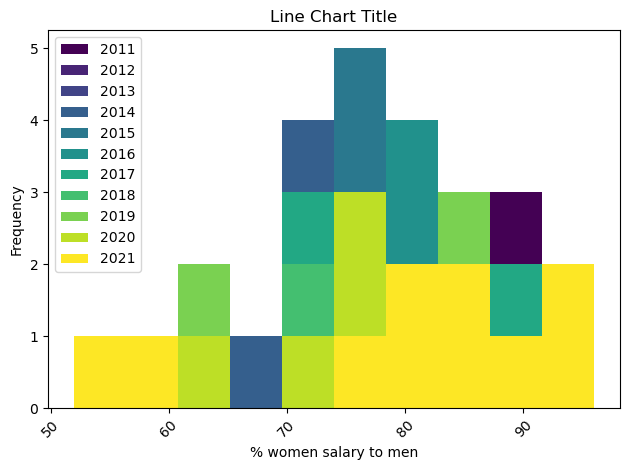

In [151]:
# Define the columns you want to use for x and y values
x_column = 'Items'
y_columns = ratio_salaries_cleaned_copy.columns[3:]  # Columns from 2011 onwards

# Plotting a line chart using specified columns
ratio_salaries_cleaned_copy.plot(x=x_column, y=y_columns, kind='hist', colormap='viridis')

plt.xlabel("% women salary to men")  # Replace with appropriate x-axis label
plt.title("Line Chart Title")  # Replace with appropriate chart title
plt.legend(y_columns)  # Add legend using the column names
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Economic sectors

In [124]:
document_12 ='Resources/Employment_gender_occupation.xlsx'
employment_gender = pd.read_excel(document_12)
employment_gender

,Кесиптик топтору жана жынысы боюнча калктын жумуштуулугу,Занятость населения по полу и группам занятий,Employment of the population by gender and occupation groups,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,(миң адам),(тыс. человек),(thousand people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Бардыгы,Всего,Total,1930.5,1991.2,2077.1,2096.1,2152.7,2184.3,2216.4,...,2277.7,2286.4,2263.0,2302.7,2352.1,2363.7,2351.2,2382.5,2442.7,2445.2
5,аялдар,женщины,women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,эркектер,мужчины,men,1083.8,1140.7,1195.9,1214.4,1251.7,1257.0,1292.2,...,1338.8,1351.0,1362.2,1364.1,1402.9,1428.4,1451.6,1471.7,1505.3,1495.4
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Жетекчилер,Руководители,Managers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Бардыгы,Всего,Total,16.7,24.7,39.6,49.2,52.3,43.6,39.2,...,34.2,32.8,25.3,21.7,21.1,27.0,42.4,38.3,54.0,53.4


In [125]:
# Select columns 4 to 21
columns_to_convert = employment_gender.columns[3:21]
# Convert the selected columns to numeric
employment_gender[columns_to_convert] = employment_gender[columns_to_convert].apply(pd.to_numeric, errors='coerce')
employment_gender

,Кесиптик топтору жана жынысы боюнча калктын жумуштуулугу,Занятость населения по полу и группам занятий,Employment of the population by gender and occupation groups,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,(миң адам),(тыс. человек),(thousand people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Бардыгы,Всего,Total,1930.5,1991.2,2077.1,2096.1,2152.7,2184.3,2216.4,...,2277.7,2286.4,2263.0,2302.7,2352.1,2363.7,2351.2,2382.5,2442.7,2445.2
5,аялдар,женщины,women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,эркектер,мужчины,men,1083.8,1140.7,1195.9,1214.4,1251.7,1257.0,1292.2,...,1338.8,1351.0,1362.2,1364.1,1402.9,1428.4,1451.6,1471.7,1505.3,1495.4
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Жетекчилер,Руководители,Managers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Бардыгы,Всего,Total,16.7,24.7,39.6,49.2,52.3,43.6,39.2,...,34.2,32.8,25.3,21.7,21.1,27.0,42.4,38.3,54.0,53.4


In [127]:
# Set the first row as column headers
employment_gender.columns = employment_gender.iloc[0]
# Drop the first row (it's now the header)
employment_gender = employment_gender.drop(employment_gender.index[0])
# Reset the index
employment_gender = employment_gender.reset_index(drop=True)
# Print or view the modified DataFrame
employment_gender

,NaN,NaN,NaN,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Бардыгы,Всего,Total,1930.5,1991.2,2077.1,2096.1,2152.7,2184.3,2216.4,...,2277.7,2286.4,2263.0,2302.7,2352.1,2363.7,2351.2,2382.5,2442.7,2445.2
3,аялдар,женщины,women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,эркектер,мужчины,men,1083.8,1140.7,1195.9,1214.4,1251.7,1257.0,1292.2,...,1338.8,1351.0,1362.2,1364.1,1402.9,1428.4,1451.6,1471.7,1505.3,1495.4
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Жетекчилер,Руководители,Managers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Бардыгы,Всего,Total,16.7,24.7,39.6,49.2,52.3,43.6,39.2,...,34.2,32.8,25.3,21.7,21.1,27.0,42.4,38.3,54.0,53.4
8,аялдар,женщины,women,4.3,6.2,11.9,17.3,16.5,14.1,12.0,...,9.9,10.6,7.0,7.3,7.6,9.5,15.3,14.5,22.1,25.3
9,эркектер,мужчины,men,12.3,18.4,27.7,31.9,35.8,29.5,27.2,...,24.3,22.2,18.4,14.5,13.5,17.5,27.0,23.9,32.0,28.1


In [131]:
document_12 ='Resources/Employment_gender_occupation_copy.xlsx'
employment_gender_copy = pd.read_excel(document_12)
employment_gender_copy

,Кесиптик топтору жана жынысы боюнча калктын жумуштуулугу,Занятость населения по полу и группам занятий,Employment of the population by gender and occupation groups,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,1930.5,1991.2,2077.1,2096.1,2152.7,2184.3,2216.4,...,2277.7,2286.4,2263.0,2302.7,2352.1,2363.7,2351.2,2382.5,2442.7,2445.2
1,аялдар,женщины,women,846.7,850.5,881.2,881.7,901.0,927.3,924.2,...,938.9,935.4,900.8,938.6,949.2,935.3,899.6,910.8,937.4,949.8
2,эркектер,мужчины,men,1083.8,1140.7,1195.9,1214.4,1251.7,1257.0,1292.2,...,1338.8,1351.0,1362.2,1364.1,1402.9,1428.4,1451.6,1471.7,1505.3,1495.4
3,Жетекчилер,Руководители,Managers,16.7,24.7,39.6,49.2,52.3,43.6,39.2,...,34.2,32.8,25.3,21.7,21.1,27.0,42.4,38.3,54.0,53.4
4,аялдар,женщины,women,4.3,6.2,11.9,17.3,16.5,14.1,12.0,...,9.9,10.6,7.0,7.3,7.6,9.5,15.3,14.5,22.1,25.3
5,эркектер,мужчины,men,12.3,18.4,27.7,31.9,35.8,29.5,27.2,...,24.3,22.2,18.4,14.5,13.5,17.5,27.0,23.9,32.0,28.1
6,Квалификациясы жогорку деңгээлдеги адистер,Специалисты высшего уровня квалификации,High-level professionals,179.5,196.0,206.0,197.2,204.9,203.0,202.0,...,212.7,210.4,205.3,207.7,225.0,242.6,204.2,223.4,221.5,287.8
7,аялдар,женщины,women,104.2,113.6,121.0,122.4,127.6,127.0,129.5,...,131.4,129.3,126.7,127.6,142.4,157.0,135.0,149.5,143.1,187.6
8,эркектер,мужчины,men,75.3,82.4,85.0,74.8,77.3,76.0,72.5,...,81.3,81.1,76.8,80.1,82.5,85.7,69.2,73.8,78.3,100.2
9,Квалификациясы орто деңгээлдеги адистер,Специалисты среднего уровня квалификации,Mid-level professionals,143.7,141.8,142.8,137.4,138.5,136.4,144.3,...,152.4,158.2,161.5,182.4,184.2,182.2,188.0,186.8,175.8,135.1


In [134]:
# Transpose the DataFrame
employment_gender_transposed = employment_gender_copy.T
Employment of the population by gender and occupation groups


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Кесиптик топтору жана жынысы боюнча калктын жумуштуулугу,Кыргыз Республикасы,аялдар,эркектер,Жетекчилер,аялдар,эркектер,Квалификациясы жогорку деңгээлдеги адистер,аялдар,эркектер,Квалификациясы орто деңгээлдеги адистер,...,эркектер,"Ири жана чакан өнөр жай ишканаларынын, көркөм ...",аялдар,эркектер,"Операторлор и аппаратчылар, орнотмолордун жана...",аялдар,эркектер,Квалификациясыз жумушчулар,аялдар,эркектер
Занятость населения по полу и группам занятий,Кыргызская Республика,женщины,мужчины,Руководители,женщины,мужчины,Специалисты высшего уровня квалификации,женщины,мужчины,Специалисты среднего уровня квалификации,...,мужчины,Квалифицированные рабочие крупных и мелких про...,женщины,мужчины,"Операторы и аппаратчики, машинисты установок ...",женщины,мужчины,Неквалифицированные рабочие,женщины,мужчины
Employment of the population by gender and occupation groups,Kyrgyz Republic,women,men,Managers,women,men,High-level professionals,women,men,Mid-level professionals,...,men,Skilled workers of large and small industrial ...,women,men,"Machine, device and engine operators, locksmit...",women,men,Unskilled workers,women,men
2003,1930.5,846.7,1083.8,16.7,4.3,12.3,179.5,104.2,75.3,143.7,...,430.2,222.6,50.4,172.5,113.1,8.0,105.0,161.3,77.6,83.7
2004,1991.2,850.5,1140.7,24.7,6.2,18.4,196.0,113.6,82.4,141.8,...,417.8,265.4,55.6,209.8,128.8,8.0,120.8,156.4,73.9,82.5
2005,2077.1,881.2,1195.9,39.6,11.9,27.7,206.0,121.0,85.0,142.8,...,448.0,281.0,56.7,224.3,136.8,6.6,130.2,137.6,67.6,70.0
2006,2096.1,881.7,1214.4,49.2,17.3,31.9,197.2,122.4,74.8,137.4,...,424.9,319.9,59.6,260.3,135.2,4.4,130.8,150.7,68.9,81.8
2007,2152.7,901.0,1251.7,52.3,16.5,35.8,204.9,127.6,77.3,138.5,...,407.1,356.0,65.4,290.6,144.8,4.1,140.7,161.5,79.0,82.6
2008,2184.3,927.3,1257.0,43.6,14.1,29.5,203.0,127.0,76.0,136.4,...,401.0,379.4,69.2,310.2,143.0,4.8,138.2,168.3,77.1,91.2
2009,2216.4,924.2,1292.2,39.2,12.0,27.2,202.0,129.5,72.5,144.3,...,400.5,400.0,70.8,329.2,161.6,5.0,156.6,191.6,92.3,99.3


In [140]:
# Assign row 3 as the header
employment_gender_transposed.columns = employment_gender_transposed.iloc[2]
# Drop row 3 (it's now the header)
employment_gender_transposed = employment_gender_transposed.drop(employment_gender_transposed.index[2])

In [143]:

# Drop lines 0 and 1
employment_gender_transposed = employment_gender_transposed.drop(employment_gender_transposed.index[[0, 1]])

In [144]:
# Display the DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(employment_gender_transposed)

Employment of the population by gender and occupation groups,Kyrgyz Republic,women,men,Managers,women,men,High-level professionals,women,men,Mid-level professionals,women,men,"Employees engaged in preparation of information, documentation, accounting, financial and information services",women,men,"Employees of the service sector, housing and utilities, trade and related activities",women,men,NaN,"Skilled workers in agriculture, forestry, hunting, fishing and fisheries",women,men,"Skilled workers of large and small industrial enterprises, arts and crafts, construction, transport, communications, geology and mineral exploration enterprises",women,men,"Machine, device and engine operators, locksmiths and assemblers",women,men,Unskilled workers,women,men
2003,1930.5,846.7,1083.8,16.7,4.3,12.3,179.5,104.2,75.3,143.7,79.5,64.3,48.2,35.0,13.2,285.8,158.6,127.2,NaN,759.3,329.0,430.2,222.6,50.4,172.5,113.1,8.0,105.0,161.3,77.6,83.7
2004,1991.2,850.5,1140.7,24.7,6.2,18.4,196.0,113.6,82.4,141.8,79.0,62.7,49.0,36.8,12.2,308.1,174.2,134.0,NaN,721.1,303.2,417.8,265.4,55.6,209.8,128.8,8.0,120.8,156.4,73.9,82.5
2005,2077.1,881.2,1195.9,39.6,11.9,27.7,206.0,121.0,85.0,142.8,88.3,54.5,47.9,36.4,11.5,322.7,177.8,144.8,NaN,762.8,314.9,448.0,281.0,56.7,224.3,136.8,6.6,130.2,137.6,67.6,70.0
2006,2096.1,881.7,1214.4,49.2,17.3,31.9,197.2,122.4,74.8,137.4,86.7,50.7,45.8,34.1,11.7,342.7,195.1,147.6,NaN,718.0,293.1,424.9,319.9,59.6,260.3,135.2,4.4,130.8,150.7,68.9,81.8
2007,2152.7,901.0,1251.7,52.3,16.5,35.8,204.9,127.6,77.3,138.5,89.0,49.5,51.3,34.8,16.4,348.3,196.7,151.6,NaN,695.2,288.1,407.1,356.0,65.4,290.6,144.8,4.1,140.7,161.5,79.0,82.6
2008,2184.3,927.3,1257.0,43.6,14.1,29.5,203.0,127.0,76.0,136.4,89.3,47.2,50.8,33.6,17.2,355.8,209.3,146.5,NaN,704.0,303.0,401.0,379.4,69.2,310.2,143.0,4.8,138.2,168.3,77.1,91.2
2009,2216.4,924.2,1292.2,39.2,12.0,27.2,202.0,129.5,72.5,144.3,97.0,47.3,46.8,30.1,16.7,356.7,213.9,142.8,NaN,674.1,273.6,400.5,400.0,70.8,329.2,161.6,5.0,156.6,191.6,92.3,99.3
2010,2243.7,926.0,1317.7,35.2,11.4,23.8,206.3,129.3,76.9,147.3,100.0,47.3,44.7,29.2,15.5,373.1,223.2,149.8,NaN,655.1,256.2,398.8,400.0,70.8,329.2,161.5,4.0,157.5,220.6,101.9,118.8
2011,2277.7,938.9,1338.8,34.2,9.9,24.3,212.7,131.4,81.3,152.4,102.2,50.2,42.7,28.9,13.9,368.0,221.1,146.9,NaN,654.9,264.7,390.2,396.2,68.5,327.7,160.8,4.1,156.6,255.8,108.1,147.7
2012,2286.4,935.4,1351.0,32.8,10.6,22.2,210.4,129.3,81.1,158.2,109.2,49.0,41.3,24.3,17.1,389.0,225.5,163.4,NaN,645.3,263.6,381.7,393.6,71.5,322.1,175.0,7.7,167.3,240.8,93.7,147.1


In [152]:
employment_gender_transposed.shape

(18, 31)

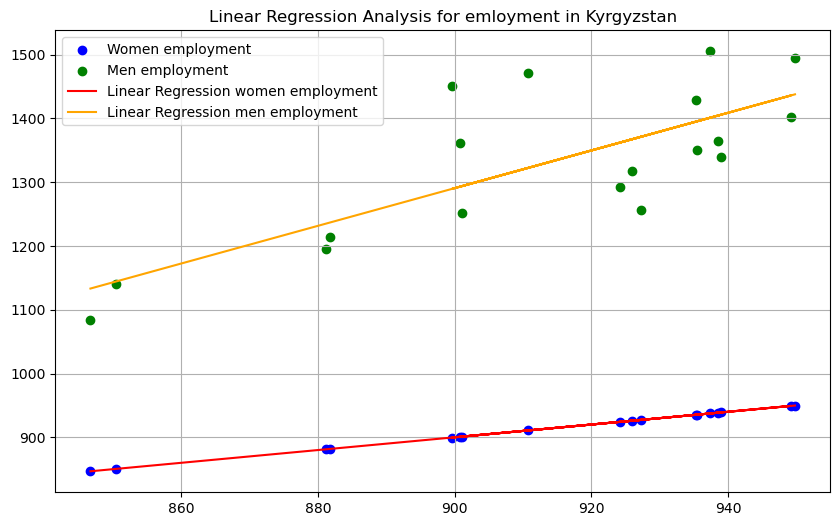

In [197]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 1:2]

# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 1:3]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for emloyment in Kyrgyzstan')
plt.legend()
plt.grid(True)
plt.show()

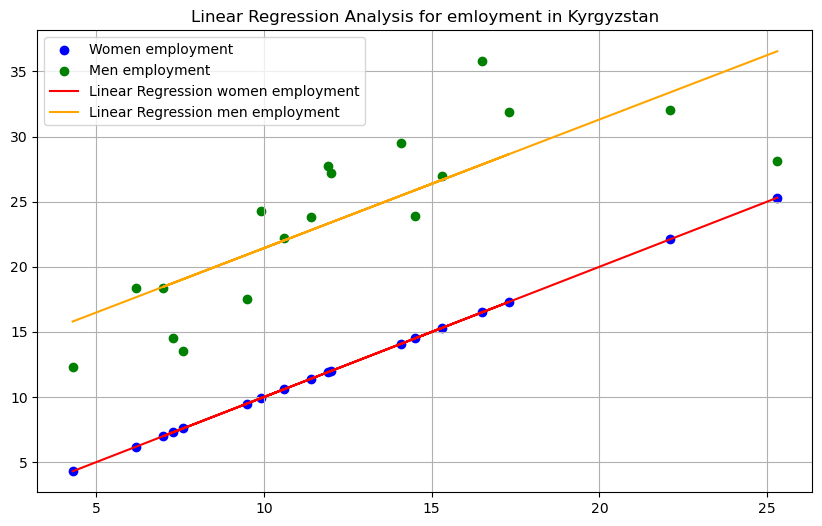

In [192]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 4:5]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 4:6]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for emloyment in Kyrgyzstan')
plt.legend()
plt.grid(True)
plt.show()

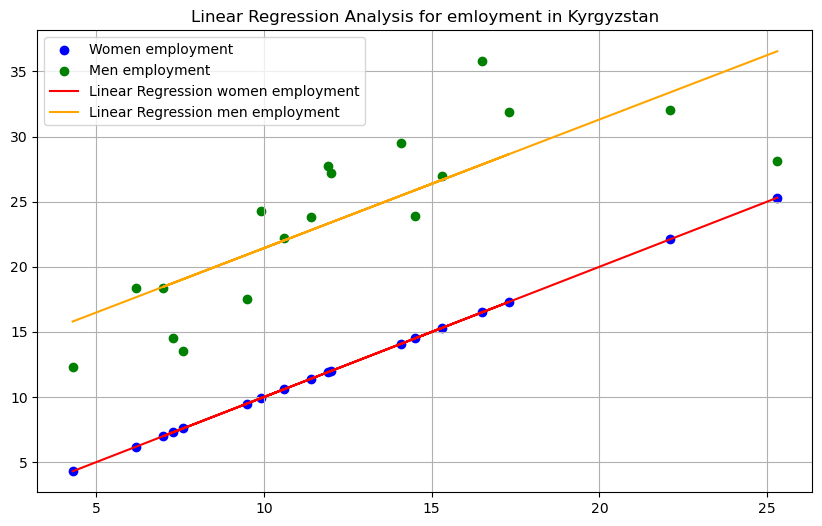

In [191]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 4:5]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 4:6]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for emloyment in Kyrgyzstan')
plt.legend()
plt.grid(True)
plt.show()

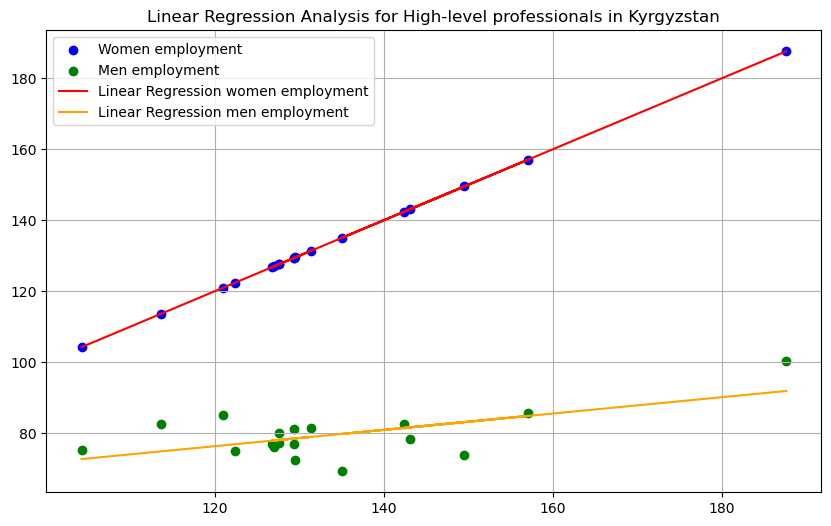

In [190]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 7:8]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 7:9]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for High-level professionals in Kyrgyzstan')
plt.legend()
plt.grid(True)
plt.show()


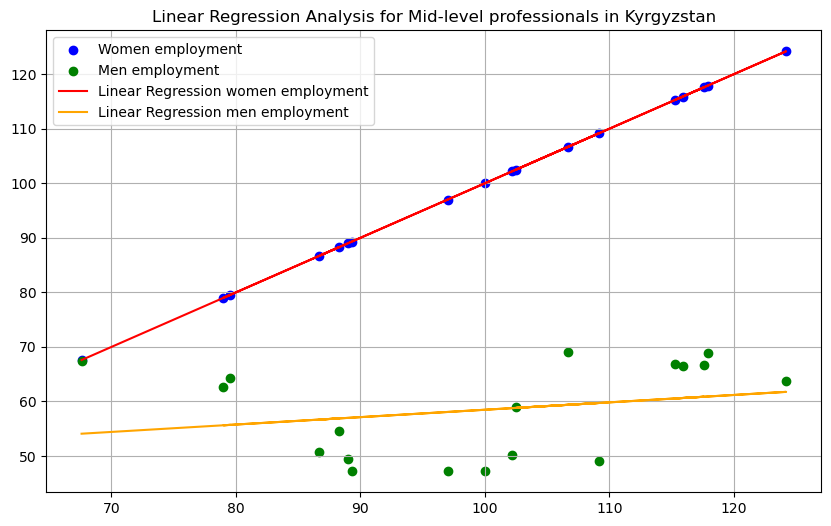

In [196]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 10:11]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 10:12]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for Mid-level professionals in Kyrgyzstan')
plt.legend()
plt.grid(True)
plt.show()


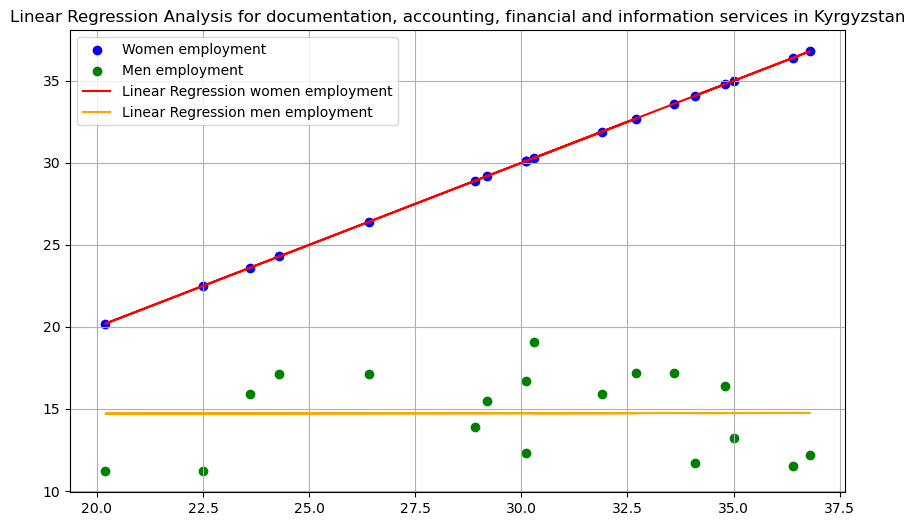

In [201]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 13:14]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 13:15]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for documentation, accounting, financial and information services in Kyrgyzstan')
plt.legend()
plt.grid(True)
plt.show()


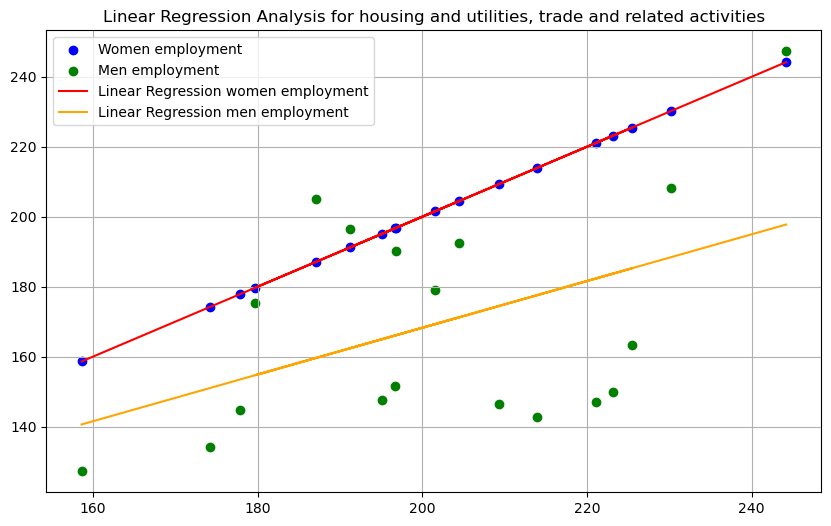

In [208]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 16:17]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 16:18]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for housing and utilities, trade and related activities')
plt.legend()
plt.grid(True)
plt.show()


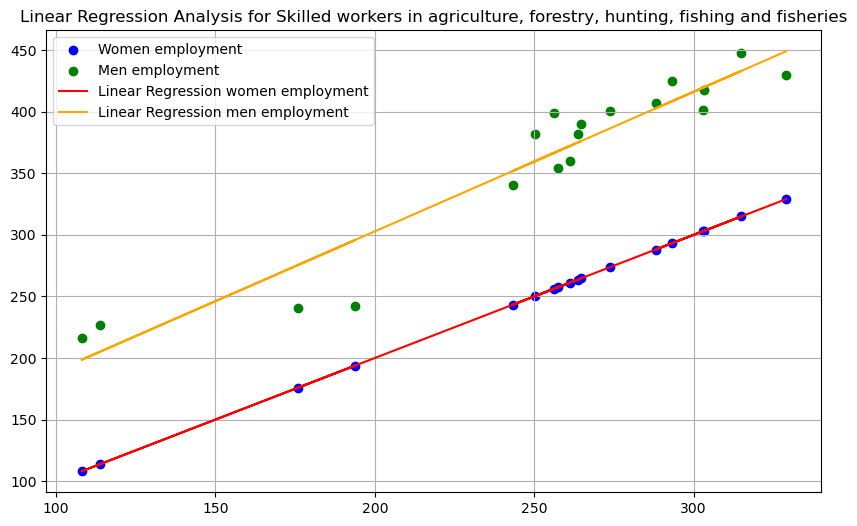

In [211]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 20:21]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 20:22]
model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for Skilled workers in agriculture, forestry, hunting, fishing and fisheries')
plt.legend()
plt.grid(True)
plt.show()


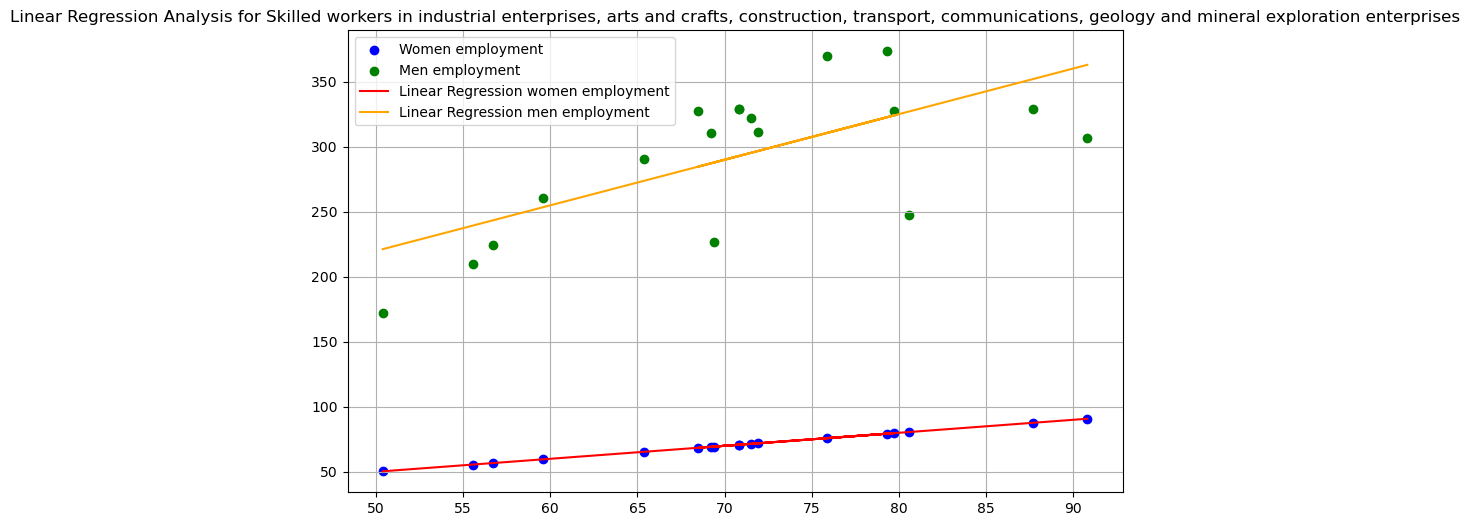

In [218]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 23:24]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 23:25]
# model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for Skilled workers in industrial enterprises, arts and crafts, construction, transport, communications, geology and mineral exploration enterprises')
plt.legend()
plt.grid(True)
plt.show()


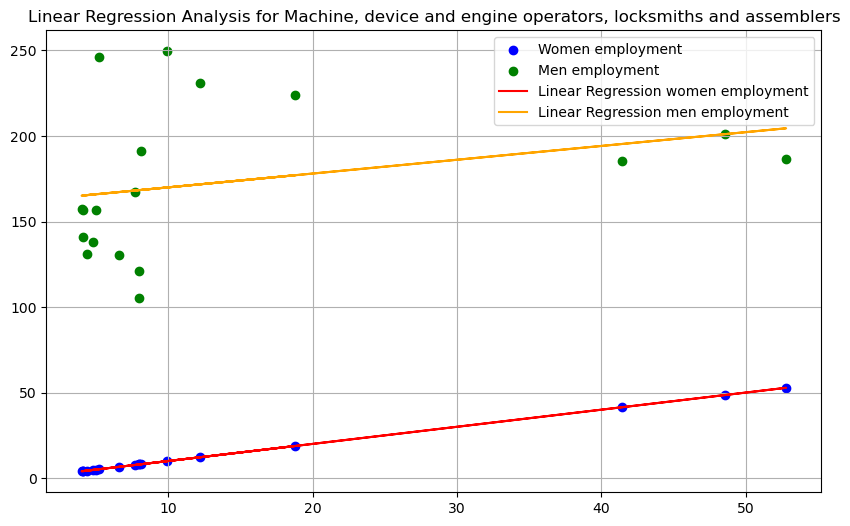

In [222]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 26:27]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 26:28]
# model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for Machine, device and engine operators, locksmiths and assemblers')
plt.legend()
plt.grid(True)
plt.show()



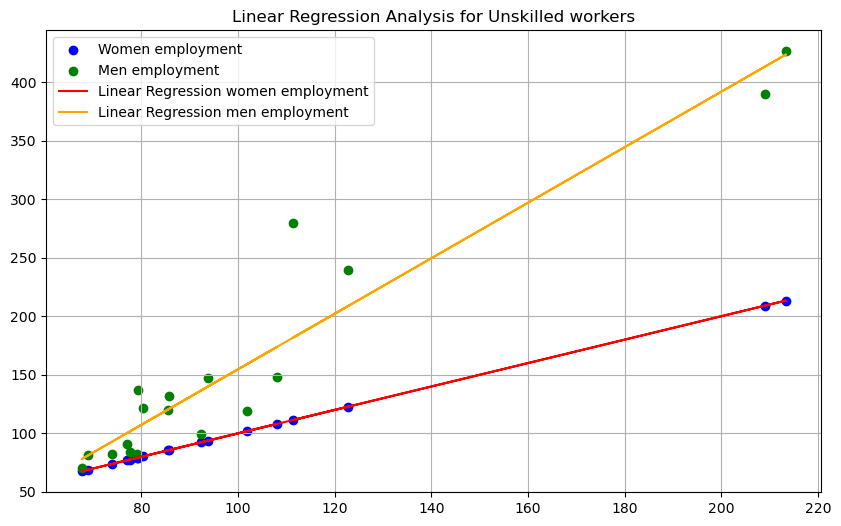

In [225]:
# Select the independent variable (x) from the 2nd column
x = employment_gender_transposed.iloc[:, 29:30]
# Select the dependent variables (y) from the 2nd and 3rd columns
y = employment_gender_transposed.iloc[:, 29:31]
# model = LinearRegression()
model.fit(x, y)
coefficients = model.coef_
intercept = model.intercept_
# Predict the values using the model
y_pred = model.predict(x)

# Plotting the scatter plot and linear regression lines
plt.figure(figsize=(10, 6))

plt.scatter(x, y.iloc[:, 0], color='blue', label='Women employment')
plt.scatter(x, y.iloc[:, 1], color='green', label='Men employment')
plt.plot(x, y_pred[:, 0], color='red', label='Linear Regression women employment')
plt.plot(x, y_pred[:, 1], color='orange', label='Linear Regression men employment')
plt.title('Linear Regression Analysis for Unskilled workers')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
document_13='Resources/employmnet_gender.xls'
employment_gender = pd.read_excel(document_13)
employment_gender

,1.07.00.07 Экономикалык ишмердиктин,1.07.00.07 Численность работников,"1.07.00.07 Number of employees of enterprises,",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"түрлөрү боюнча ишканалардын,","предприятий, организаций по видам",organizations bu type of economic activity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,уюмдардын кызматкерлеринин саны,экономической деятельности,(persons),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(адам),(человек),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Көрсөткүчтөрдү иштетүүнүн мезгилдүүлүгү:,Периодичность разработки показателей:,Freguency of development indicators:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,айлык - отчеттук мезгилден кийинки,месячная - через 2 месяца после отчетного,monthly - 2 months after the reporting period;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2 айдан кийин;,периода;,annual - 6 months after the reporting period.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,жылдык - отчеттук мезгилден кийинки,годовая - через 6 месяцев после отчетного пери...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6 айдан кийин,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Calculate the average for all years across each region
average_across_years = ratio_salaries_cleaned_copy.mean(axis=1)
# Add a new column 'Average' to the existing DataFrame
ratio_salaries_cleaned_copy['Average'] = average_across_years

# Print the modified DataFrame with the added 'Average' column
ratio_salaries_cleaned_copy



/var/folders/xq/xdbqztz92zs24q39hvzwj65m0000gn/T/ipykernel_9958/2175332061.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_across_years = ratio_salaries_cleaned_copy.mean(axis=1)


2,Көрсөткүчтөрдүн аталышы,Наименование показателей,Items,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,78,74,73,71,75,75,72,72,77,75,75,74.272727
4,Баткен облусу,Баткенская область,Batken oblast,85,71,73,70,77,82,75,78,81,82,89,78.454545
5,Жалал-Абад облусу,Джалал-Абадская область,Djalal-Abad oblast,70,70,69,66,75,65,61,61,63,65,58,65.727273
6,Ысык-Көл облусу,Иссык-Кульская область,Issyk-Kul oblast,88,89,82,76,86,86,77,87,93,85,86,85.000000
7,Нарын облусу,Нарынская область,Naryn oblast,96,95,88,81,85,83,88,81,84,96,93,88.181818
8,Ош облусу,Ошская область,Osh oblast,88,77,78,78,80,83,91,83,92,88,92,84.545455
9,Талас облусу,Таласская область,Talas oblast,87,78,80,73,81,81,73,63,62,72,52,72.909091
10,Чүй облусу,Чуйская область,Chui oblast,82,70,73,70,75,76,72,70,74,76,79,74.272727
11,Бишкек ш.,г. Бишкек,Bishkek city,76,77,75,75,77,80,76,76,83,77,79,77.363636
12,Ош ш.,г. Ош,Osh city,88,79,76,75,79,82,79,81,85,87,85,81.454545


In [11]:
document_14="Resources/payment_economic_sector.xlsx"
employment_payment = pd.read_excel(document_14)
employment_payment 

,1.07.00.11 Экономикалык ишмердиктин,1.07.00.11 Заработная плата по видам,1.07.00.11 Wages by type of,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,т³рл¼р³ (ЭИМК-2) боюнча эмгек акы,экономической деятельности (ГКЭД-2),economic activity (NACE-2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(сом),(сомов),(soms),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,К¼рс¼тк³чт¼рд³ иштет³³н³н мезгилд³³л³г³:,Периодичность разработки показателей:,Freguency of development indicators:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,айлык - отчеттук мезгилден кийинки,месячная - через 2 месяца после отчетного,monthly - 2 months after the reporting period;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2 айдан кийин;,периода;,annual - 6 months after the reporting period.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,жылдык - отчеттук мезгилден кийинки,годовая - через 6 месяцев после отчетного пери...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6 айдан кийин,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,К¼рс¼тк³чт¼рд³н аталышы,Наименование показателей,Items,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0


# Heads of the entities in KG absolute numbers

In [65]:
document_2 = 'Resources/1b008eb4-44f1-4e98-8947-95e7aa47228c.xlsx'
business_entities_priv_owner = pd.read_excel(document_2)
# Drop columns from index 19 to the end
business_entities_priv_owner = business_entities_priv_owner.iloc[:, :19]
business_entities_priv_owner.head(5)

,Жынысы жана аймагы боюнча жеке менчиктеги чарбалык субъекттердин жетекчилери,Руководители хозяйствующих субъектов с частной формой собственности по полу и территории,Heads of business entities with private ownership by gender and territory,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,"(жылдын башына карата, адам)","(на начало года, человек)","(at the beginning of the year, people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2007.0,2008.0,2009.0,2010 1,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Бардыгы,Всего,Total,335399.0,359001.0,469903.0,390097,447071.0,477361.0,514181.0,553107.0,583067.0,616088.0,639005.0,660669.0,684209.0,701385.0,718039.0,733930.0


In [66]:
business_entities_priv_owner= business_entities_priv_owner.applymap(lambda x: f'{x:.0f}' if isinstance(x, (int, float)) else x)
business_entities_priv_owner.columns = business_entities_priv_owner.iloc[1]
business_entities_priv_owner = business_entities_priv_owner[2:]
business_entities_priv_owner

1,nan,nan,nan,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,335399,359001,469903,390097,447071,477361,514181,553107,583067,616088,639005,660669,684209,701385,718039,733930
5,аялдар,женщины,women,91912,98899,118023,83239,101590,112636,126981,140176,150885,162485,170802,178532,186673,193281,199296,205926
6,эркектер,мужчины,men,243487,260102,351880,306858,345481,364725,387200,412931,432182,453603,468203,482137,497536,508104,518743,528004
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,18179,20215,22182,31223,37199,42667,45871,50163,53684,56319,58730,60967,63472,65705,67474,69736
10,аялдар,женщины,women,3899,4375,4725,2620,3980,5194,6456,7673,8702,9586,10294,10960,11764,12702,13340,14192
11,эркектер,мужчины,men,14280,15840,17457,28603,33219,37473,39415,42490,44982,46733,48436,50007,51708,53003,54134,55544


In [72]:
def process_excel_file(url):
    # Read the Excel file into a DataFrame
    df = pd.read_excel(url)
    
    # Drop columns from index 19 to the end
    df_cleaned = df.iloc[:, :19]
    
    return df_cleaned

In [73]:
def process_business_entities(df):
    # Format float cells to have no numbers after the decimal point
    df_formatted = df.applymap(lambda x: f'{x:.0f}' if isinstance(x, (int, float)) else x)
    
    # Use the second row as column names
    df_formatted.columns = df_formatted.iloc[1]
    df_formatted = df_formatted[2:]
    
    return df_formatted

In [77]:
# Call the function and store the result
document_url = 'Resources/21019f5b-7d23-4e8f-9a86-6c8051d9365f.xlsx'
df_cleaned = process_excel_file(document_url)
small_business_executives=process_business_entities(df_cleaned) 
small_business_executives

1,nan,nan,nan,2006,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,56311,61235,66573,69412,18639,18059,19498,19712,19178,20414,21577,21851,22518,24166,23252,25283
5,аялдар,женщины,women,11317,12611,13877,14566,4633,4693,5321,5564,5509,6011,6418,6527,6810,7242,7090,7721
6,эркектер,мужчины,men,44994,48624,52696,54846,14006,13366,14177,14148,13669,14403,15159,15324,15708,16924,16162,17562
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,1722,1895,2100,2134,735,731,747,805,880,908,1017,945,975,1023,982,1043
10,аялдар,женщины,women,200,240,265,269,79,72,99,122,185,205,263,278,293,276,287,315
11,эркектер,мужчины,men,1522,1655,1835,1865,656,659,648,683,695,703,754,667,682,747,695,728


In [78]:
document_5 = 'Resources/47f5150b-4c3f-46f1-a97e-f5de41eb8cfd.xlsx'
df_cleaned = process_excel_file(document_5)
heads_economicentities_municipal=process_business_entities(df_cleaned) 
heads_economicentities_municipal

1,nan,nan,nan,2006,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,319578,5238,5873,5930,4472,4286,4054,3959,3816,3356,3361,3204,3256,3276,3262,2480
5,аялдар,женщины,women,87094,1271,1390,1438,1311,1355,1381,1408,1426,1360,1410,1429,1502,1516,1516,969
6,эркектер,мужчины,men,232484,3967,4483,4492,3161,2931,2673,2551,2390,1996,1951,1775,1754,1760,1746,1511
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,16799,345,414,412,332,327,299,310,354,319,326,213,213,211,201,205
10,аялдар,женщины,women,3440,27,30,30,29,25,26,32,80,88,95,89,89,90,87,88
11,эркектер,мужчины,men,13359,318,384,382,303,302,273,278,274,231,231,124,124,121,114,117


In [79]:
document_6 = 'Resources/5fd71c91-4975-4710-b2dc-afa6b04e9438.xlsx'
df_cleaned = process_excel_file(document_6)
heads_large_enter=process_business_entities(df_cleaned) 
heads_large_enter

1,nan,nan,nan,2006,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,2296,2308,2296,2211,1586,1658,1652,1698,1839,1794,1779,1816,1865,1940,1965,1985
5,аялдар,женщины,women,422,428,431,451,394,417,421,448,544,539,521,557,575,653,677,710
6,эркектер,мужчины,men,1874,1880,1865,1760,1192,1241,1231,1250,1295,1255,1258,1259,1290,1287,1288,1275
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,81,81,81,81,62,88,87,85,108,104,123,133,138,119,121,133
10,аялдар,женщины,women,11,11,9,9,8,15,17,17,21,21,21,23,24,22,22,28
11,эркектер,мужчины,men,70,70,72,72,54,73,70,68,87,83,102,110,114,97,99,105


In [80]:
document_7 = 'Resources/6503c27a-6a8b-4a6f-b801-e50122818a15.xlsx'
df_cleaned = process_excel_file(document_7)
heads_peasant_farms=process_business_entities(df_cleaned) 
heads_peasant_farms

1,nan,nan,nan,2006,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,90847,94694,99556,196970,245568,263715,271149,275082,281556,287322,300236,312922,323262,333026,342164,349180
5,аялдар,женщины,women,12554,13523,14848,30247,37073,41368,43495,45297,48115,50530,54897,58899,62212,65166,68136,70291
6,эркектер,мужчины,men,78293,81171,84708,166723,208495,222347,227654,229785,233441,236792,245339,254023,261050,267860,274028,278889
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,5195,5510,6062,7080,25165,25827,28599,28230,28645,29148,29703,30130,30563,31032,31384,31830
10,аялдар,женщины,women,534,590,678,808,1104,1291,1747,1889,2069,2216,2469,2585,2706,2834,2938,3080
11,эркектер,мужчины,men,4661,4920,5384,6272,24061,24536,26852,26341,26576,26932,27234,27545,27857,28198,28446,28750


In [83]:
document_8 = 'Resources/9e687117-2ca4-40a6-93a7-3cc03e436553.xlsx'
df_cleaned = process_excel_file(document_8)
Individual_entrepreneurs =process_business_entities(df_cleaned) 
Individual_entrepreneurs

1,nan,nan,nan,2006,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,163119,179613,193425,204246,127665,166869,188141,220893,253915,276740,295644,305185,315912,327741,336813,344424
5,аялдар,женщины,women,61403,65804,70234,73280,41867,55912,64290,76700,87125,94987,101824,105955,110141,114727,118637,121876
6,эркектер,мужчины,men,101716,113809,123191,130966,85798,110957,123851,144193,166790,181753,193820,199230,205771,213014,218176,222548
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,9437,10969,12322,13239,5623,10934,13592,17116,20979,23950,25932,27869,29638,31590,33506,34768
10,аялдар,женщины,women,2655,3077,3444,3660,1462,2646,3376,4486,5514,6392,6970,7552,8089,8745,9577,10045
11,эркектер,мужчины,men,6782,7892,8878,9579,4161,8288,10216,12630,15465,17558,18962,20317,21549,22845,23929,24723


In [84]:
document_9 = 'Resources/adb00f07-5775-4c85-8f55-428f66723a3b.xlsx'
df_cleaned = process_excel_file(document_9)
operating_economic_entities =process_business_entities(df_cleaned) 
operating_economic_entities

1,nan,nan,nan,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,522106,561266,591098,624283,647078,668806,692377,709780,726562,742466
5,аялдар,женщины,women,129419,142804,153623,165380,173823,181671,189921,196703,202797,209524
6,эркектер,мужчины,men,392687,418462,437475,458903,473255,487135,502456,513077,523765,532942
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Экстерриториялык уюмдардын ишмердүүлүгү,Деятельность экстерриториальных организаций,Activities of extraterritorial organizations,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
89,Бардыгы,Всего,Total,36,38,41,43,42,42,42,42,49,48
90,аялдар,женщины,women,2,2,2,4,4,4,4,4,4,4
91,эркектер,мужчины,men,34,36,39,39,38,38,38,38,45,44


In [85]:
document_11 = 'Resources/d76484df-fbee-4045-be02-abaf90b78677.xlsx'
df_cleaned = process_excel_file(document_11)
heads_state_ownership =process_business_entities(df_cleaned) 
heads_state_ownership

1,nan,nan,nan,2007,2008,2009,2010 1,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Кыргыз Республикасы,Кыргызская Республика,Kyrgyz Republic,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,Бардыгы,Всего,Total,4400,4471,4492,3053,3351,3377,3923,4298,4628,4784,4823,4819,4792,4980,5847,5822
5,аялдар,женщины,women,659,695,720,546,668,713,1024,1196,1373,1476,1586,1623,1685,1820,2412,2501
6,эркектер,мужчины,men,3741,3776,3772,2507,2683,2664,2899,3102,3255,3308,3237,3196,3107,3160,3435,3321
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,Баткен облусу,Баткенская область,Batken region,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,Бардыгы,Всего,Total,306,317,324,247,367,371,387,461,484,521,542,550,548,570,580,597
10,аялдар,женщины,women,34,36,39,28,64,71,80,108,111,141,167,177,179,206,216,244
11,эркектер,мужчины,men,272,281,285,219,303,300,307,353,373,380,375,373,369,364,364,353
